In [177]:
import numpy as np 
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
delta =0.1
number_of_particles=5000
number_of_pairs = 500
with_wind_or_not = 1
large_or_small=1
time_to_observe=100

In [178]:
class Particle:

    def __init__(self, time, vel, pos):
        self.time = time
        self.vel = vel
        self.pos = pos 
        # vel is a numpy array representing velocity
        # pos is a numpy array representing position
    def display_info (self):
        print('Time: %.2f' % self.time)
        print('Position: %.2f, %.2f' % (self.pos[0], self.pos[1]))
        print('Velocity: %.2f, %.2f' % (self.vel[0], self.vel[1]))        
    def increase_time (self):
        self.time = self.time+ delta

In [179]:
def collide_particle (particle1, particle2):
    import random
    angle_of_attack = 2*np.pi* random.random()
    v1=particle1.vel
    v2=particle2.vel
    
    pos_diff=np.array([np.cos(angle_of_attack),np.sin(angle_of_attack)])
    value=np.dot(v1-v2,pos_diff)
    new_v1=v1-value*pos_diff
    new_v2=v2+value*pos_diff
    particle1.vel=new_v1
    particle2.vel=new_v2
    particle1.increase_time()
    particle2.increase_time()

In [180]:
def collide_particle_wind (particle1, particle2, wind):
    import random
    angle_of_attack = 2*np.pi* random.random()
    v1=particle1.vel
    v2=particle2.vel
    
    pos_diff=np.array([np.cos(angle_of_attack),np.sin(angle_of_attack)])
    value=np.dot(v1-v2,pos_diff)
    new_v1=v1-value*pos_diff
    new_v2=v2+value*pos_diff
    particle1.vel=new_v1+wind
    particle2.vel=new_v2+wind
    particle1.increase_time()
    particle2.increase_time()

In [181]:
class Node:
    
    def __init__ (self, time, pos, particles):
        self.time = time
        self.pos  = pos
        self.particles = particles
        # particles is an numpy array of Particles
    def display_info (self):
        print('Time: %.2f' % self.time)
        print('Position: %.2f, %.2f' % (self.pos[0], self.pos[1]))
        print('The particles within this node: ')
        for i in self.particles:
            print('++++++++++++++++++++++++++++++++++++++++++++')
            i.display_info()
            print('++++++++++++++++++++++++++++++++++++++++++++')        
    def collide_node (self,number_of_pairs):
        self.time=self.time+ delta
        # This function takes in the number of pairs of particles to collide
        index=list(range(len(self.particles)))
        pairs=[]
        import random
        for i in range(number_of_pairs):
            new_pair=list(random.sample(index,2))
            pairs.append(new_pair)
            index=list(set(index)-set(new_pair))
        for i in pairs:
            collide_particle(self.particles[i[0]],self.particles[i[1]])   
    def collide_node_wind (self,number_of_pairs,wind):
        self.time=self.time+ delta
        # This function takes in the number of pairs of particles to collide
        index=list(range(len(self.particles)))
        pairs=[]
        import random
        for i in range(number_of_pairs):
            new_pair=list(random.sample(index,2))
            pairs.append(new_pair)
            index=list(set(index)-set(new_pair))
        for i in pairs:
            collide_particle_wind(self.particles[i[0]],self.particles[i[1]],wind)  
    def hist (self,number,):
        space=[]
        for i in self.particles:
            space.append(i.vel)
        space=np.array(space)
        x=space[:,0]
        y=space[:,1]
        if(large_or_small>0):
            plt.hist2d(x, y,bins=(100,100))
        else:
            plt.hist2d(x, y,bins=(10,10))
        plt.title("2D Histogram #"+str(number))
        plt.savefig("simu_hist"+str(number)+".png")            

Then initialize some particles with velocities following 2D Gaussian Distribution

In [182]:
#Generate an array of velocities following the 2D Gaussian Distribution with mean of x and y 1, covariace matrix being the identity matrix
velocities=np.random.multivariate_normal([1,1],[[1,0],[0,1]],number_of_particles)

In [183]:
#Generate a new node named Node1
Node1=Node(0,[1,1],[])

In [184]:
#Put all the particles into Node1
for i in range(number_of_particles):
    new_particle= Particle(0,velocities[i],np.array([1,1]))
    lst=Node1.particles
    lst.append(new_particle)
    Node1.particles=lst

Now for each time step, randomly select pairs of particles at the node to collide with each other.

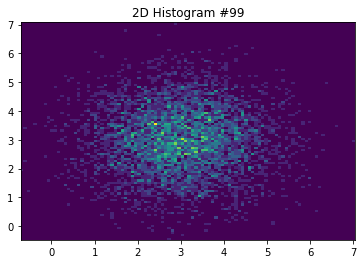

In [185]:
for i in range (time_to_observe):
    if (with_wind_or_not>0):
        Node1.collide_node_wind(number_of_pairs,np.array([0.1,0.1]))
    else:
        Node1.collide_node(number_of_pairs)
    Node1.hist(i)